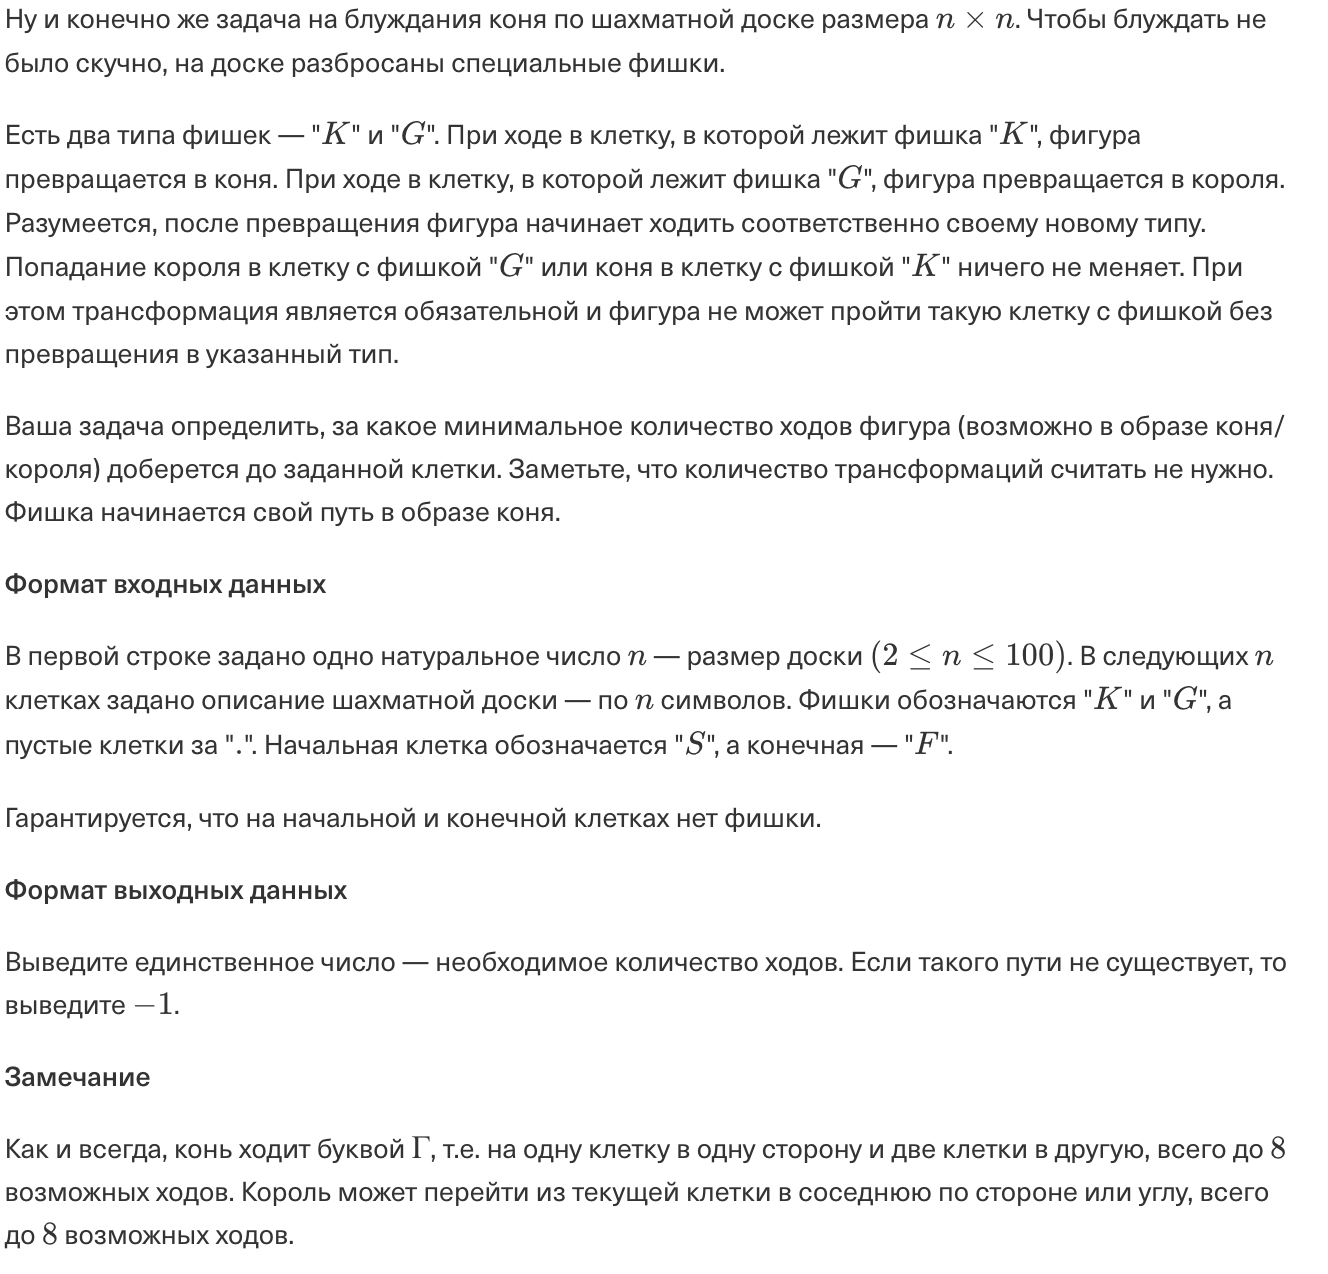

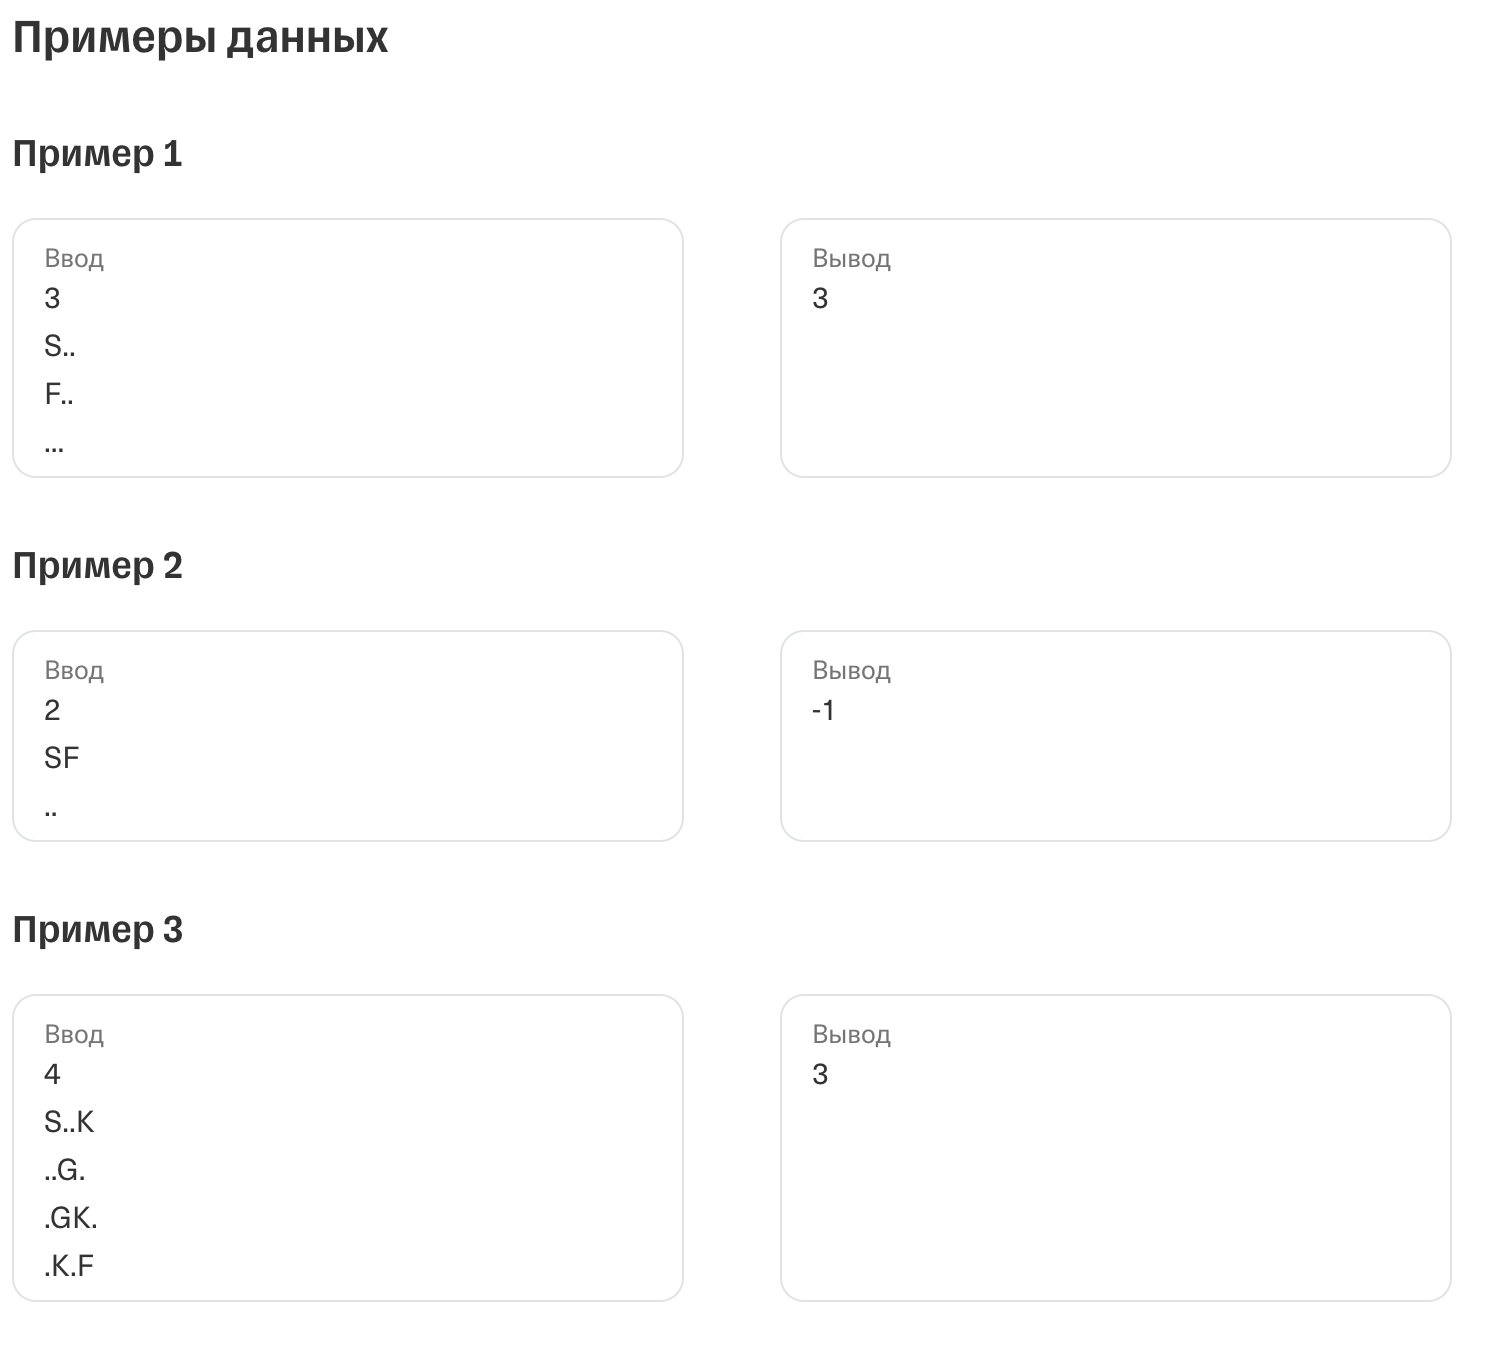

In [4]:
from collections import deque

def valid_moves(n, row, col, piece):
    moves = []
    knight_moves = [(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]
    king_moves = [(1, 1), (1, 0), (1, -1), (0, 1), (0, -1), (-1, 1), (-1, 0), (-1, -1)]
    
    if piece == 'knight':
        possible_moves = knight_moves
    elif piece == 'king':
        possible_moves = king_moves
    
    for dr, dc in possible_moves:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < n and 0 <= new_col < n:
            moves.append((new_row, new_col))
    
    return moves

def min_moves(n, board, start_row, start_col, end_row, end_col):
    visited = set()
    queue = deque([(start_row, start_col, 'knight', 0)])
    
    while queue:
        row, col, piece, moves = queue.popleft()
        if row == end_row and col == end_col:
            return moves
        
        for new_row, new_col in valid_moves(n, row, col, piece):
            if board[new_row][new_col] == 'G':
                new_piece = 'king'
            elif board[new_row][new_col] == 'K':
                new_piece = 'knight'
            else:
                new_piece = piece
            
            if (new_row, new_col, new_piece) not in visited:
                visited.add((new_row, new_col, new_piece))
                queue.append((new_row, new_col, new_piece, moves + 1))
    
    return -1

# Чтение входных данных
n = int(input())
board = [input().strip() for _ in range(n)]

start_row, start_col = None, None
end_row, end_col = None, None

# Находим начальную и конечную клетки
for i in range(n):
    for j in range(n):
        if board[i][j] == 'S':
            start_row, start_col = i, j
        elif board[i][j] == 'F':
            end_row, end_col = i, j

# Вызов функции для нахождения минимального количества ходов
print(min_moves(n, board, start_row, start_col, end_row, end_col))


3
